In [1]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys,traceback
import random
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
hr_data=pd.read_csv('train.csv')

In [3]:
#Import Data
hr = hr_data
col_names = hr.columns.tolist()
print("Column names:")
print(col_names)

Column names:
['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Department', 'salary', 'Attrition']


In [4]:
print("\nSample data:")
hr.head()


Sample data:


,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,Attrition
0,3.8,5.3,3,167,3,0,0,sales,low,1
1,8.0,8.6,6,272,6,0,0,sales,medium,1
2,1.1,8.8,8,282,4,0,0,sales,medium,1
3,3.7,5.2,3,169,3,0,0,sales,low,1
4,4.1,5.0,3,163,3,0,0,sales,low,1


In [5]:
hr=hr.rename(columns = {'Department':'department'})
#Display data type for each column
hr.dtypes

satisfaction_level        float64
last_evaluation_rating    float64
projects_worked_on          int64
average_montly_hours        int64
time_spend_company          int64
Work_accident               int64
promotion_last_5years       int64
department                 object
salary                     object
Attrition                   int64
dtype: object

In [6]:
#Check for Missing Values
hr.isnull().any()

satisfaction_level        False
last_evaluation_rating    False
projects_worked_on        False
average_montly_hours      False
time_spend_company        False
Work_accident             False
promotion_last_5years     False
department                False
salary                    False
Attrition                 False
dtype: bool

In [7]:
#Dimensions of our dataset
hr.shape

(25491, 10)

In [8]:
#Summary for each variable
hr.describe()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Attrition
count,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000
mean,6.137704,7.167832,4.215174,205.286846,3.497156,0.146012,0.021419,0.234985
std,2.486316,1.710754,1.324228,50.182916,1.457715,0.353125,0.144780,0.423998
min,0.900000,3.600000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,4.400000,5.600000,3.000000,160.000000,3.000000,0.000000,0.000000,0.000000
50%,6.500000,7.200000,4.000000,204.000000,3.000000,0.000000,0.000000,0.000000
75%,8.200000,8.700000,5.000000,249.000000,4.000000,0.000000,0.000000,0.000000
max,10.000000,10.000000,8.000000,320.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
#To get the unique values for department
hr['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [10]:
#Combine "technical","support" and "IT" into one department
hr['department']=np.where(hr['department'] =='support', 'technical', hr['department'])
hr['department']=np.where(hr['department'] =='IT', 'technical', hr['department'])

In [11]:
#Print the updated values of departments
print(hr['department'].unique())

['sales' 'accounting' 'hr' 'technical' 'management' 'product_mng'
 'marketing' 'RandD']


### Data Exploration

In [12]:
hr['Attrition'].value_counts()

0    19501
1     5990
Name: Attrition, dtype: int64

In [13]:
hr.groupby('Attrition').mean()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
Attrition,,,,,,,
0,6.668899,7.159582,4.198041,203.199836,3.378647,0.176247,0.026665
1,4.408347,7.194691,4.270952,212.081302,3.882972,0.047579,0.004341


In [14]:
hr.groupby('department').mean()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Attrition
department,,,,,,,,
RandD,6.186966,7.095356,4.250936,204.902622,3.361049,0.173783,0.034457,0.153558
accounting,5.835790,7.193845,4.224924,205.725684,3.530395,0.127660,0.018237,0.265957
hr,6.037272,7.072720,4.078509,203.311657,3.357653,0.122125,0.021412,0.283902
management,6.218932,7.247423,4.262418,205.244611,4.299906,0.160262,0.111528,0.134958
marketing,6.200756,7.165430,4.087973,203.987629,3.578694,0.158763,0.050172,0.229553
product_mng,6.200727,7.185535,4.223910,203.686262,3.456407,0.149934,0.000000,0.218626
sales,6.164850,7.110125,4.183995,205.039581,3.541804,0.143984,0.023519,0.240212
technical,6.137237,7.212923,4.257805,206.091864,3.410974,0.145222,0.008798,0.245317


In [15]:
hr.groupby('salary').mean()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Attrition
salary,,,,,,,,
high,6.386124,7.049012,4.170743,203.784102,3.686736,0.153340,0.060207,0.066792
low,6.019963,7.180714,4.215674,205.429090,3.441506,0.144884,0.008385,0.291945
medium,6.222742,7.176300,4.223226,205.417351,3.523353,0.145868,0.028644,0.203156


### Data Visualization

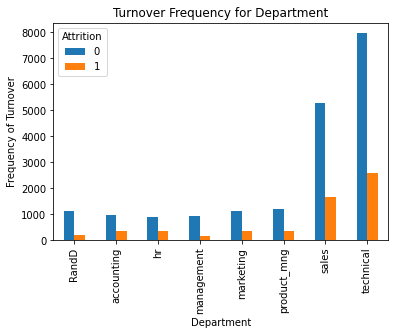

In [16]:
%matplotlib inline

#Bar chart for department employee work for and the frequency of turnover
pd.crosstab(hr['department'],hr['Attrition']).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

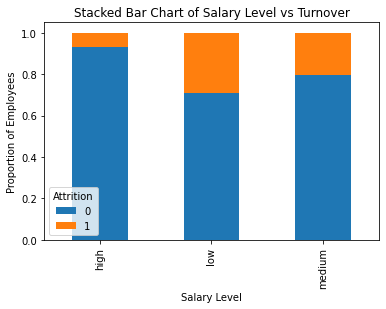

In [17]:
#Bar chart for employee salary level and the frequency of turnover
table=pd.crosstab(hr.salary, hr.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

In [18]:
#Proportion of employees left by department
pd.crosstab(hr.department, hr.Attrition)

Attrition,0,1
department,,
RandD,1130,205
accounting,966,350
hr,903,358
management,923,144
marketing,1121,334
product_mng,1183,331
sales,5298,1675
technical,7977,2593


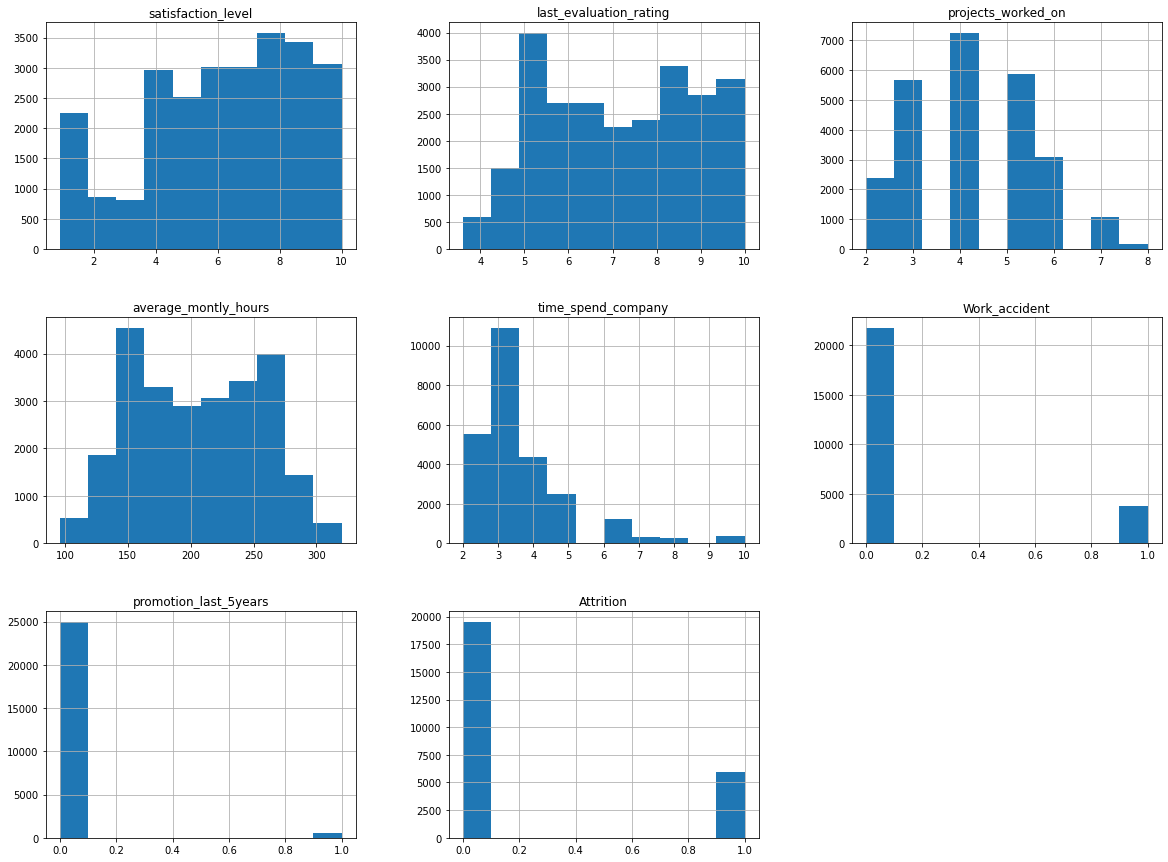

In [19]:
#Histogram of numeric variables
num_bins = 10

hr.hist(bins=num_bins, figsize=(20,15))
plt.savefig("hr_histogram_plots")
plt.show()

In [20]:
hr.head()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,Attrition
0,3.8,5.3,3,167,3,0,0,sales,low,1
1,8.0,8.6,6,272,6,0,0,sales,medium,1
2,1.1,8.8,8,282,4,0,0,sales,medium,1
3,3.7,5.2,3,169,3,0,0,sales,low,1
4,4.1,5.0,3,163,3,0,0,sales,low,1


### One-Hot-Encoding

In [21]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
cat_vars=['department','salary']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(hr[var], prefix=var)
    hr1=hr.join(cat_list)
    hr=hr1

In [22]:
#dropping main columns and 
hr.drop(hr.columns[[7, 8]], axis=1, inplace=True)

In [23]:
hr.columns.values

array(['satisfaction_level', 'last_evaluation_rating',
       'projects_worked_on', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years', 'Attrition',
       'department_RandD', 'department_accounting', 'department_hr',
       'department_management', 'department_marketing',
       'department_product_mng', 'department_sales',
       'department_technical', 'salary_high', 'salary_low',
       'salary_medium'], dtype=object)

In [24]:
hr.head()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Attrition,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_technical,salary_high,salary_low,salary_medium
0,3.8,5.3,3,167,3,0,0,1,0,0,0,0,0,0,1,0,0,1,0
1,8.0,8.6,6,272,6,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,1.1,8.8,8,282,4,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,3.7,5.2,3,169,3,0,0,1,0,0,0,0,0,0,1,0,0,1,0
4,4.1,5.0,3,163,3,0,0,1,0,0,0,0,0,0,1,0,0,1,0


In [25]:
hr_vars=hr.columns.values.tolist()
y=['Attrition']
X=[i for i in hr_vars if i not in y]

In [26]:
X

['satisfaction_level',
 'last_evaluation_rating',
 'projects_worked_on',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'department_RandD',
 'department_accounting',
 'department_hr',
 'department_management',
 'department_marketing',
 'department_product_mng',
 'department_sales',
 'department_technical',
 'salary_high',
 'salary_low',
 'salary_medium']

In [27]:
hr.shape

(25491, 19)

In [28]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier,StackingClassifier
from lightgbm import LGBMClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from mlxtend.classifier import StackingCVClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [29]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

### Feature Selection

In [30]:
model = LogisticRegression()

rfe = RFE(model, 10)
rfe = rfe.fit(hr[X], hr[y])
print(rfe.support_)
print(rfe.ranking_)

[ True False False False  True  True  True  True False  True  True False
 False False False  True  True  True]
[1 3 2 9 1 1 1 1 4 1 1 6 8 7 5 1 1 1]


In [31]:
cols=['satisfaction_level', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low','salary_medium'] 
X=hr[cols]
y=hr['Attrition']

### Logistic Regression Model

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [33]:
#Logistic Regression Classifier
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [34]:
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.766


In [35]:
#Classification report for Logistic Regression
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      5840
           1       0.51      0.26      0.34      1808

    accuracy                           0.77      7648
   macro avg       0.66      0.59      0.60      7648
weighted avg       0.73      0.77      0.74      7648



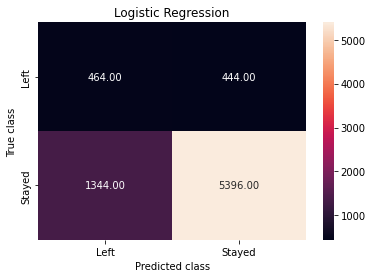

In [36]:
#Confusion Matrix for Logistic Regression
logreg_y_pred = logreg.predict(X_test)
logreg_cm = metrics.confusion_matrix(logreg_y_pred, y_test, [1,0])
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.savefig('logistic_regression')

### Random Forest

In [37]:
#Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [38]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.965


In [39]:
#Classification report for Random Forest
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      5840
           1       0.92      0.94      0.93      1808

    accuracy                           0.97      7648
   macro avg       0.95      0.96      0.95      7648
weighted avg       0.97      0.97      0.97      7648



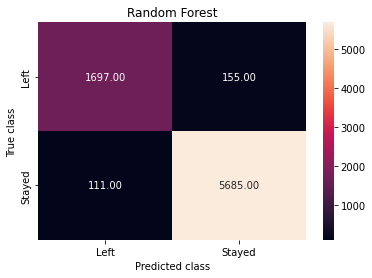

In [40]:
#Confusion Matrix for Random Forest
y_pred = rf.predict(X_test)
forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

### Support Vector Machine

In [41]:
#SVM Classifier
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [42]:
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))

Support vector machine accuracy: 0.891


In [43]:
#Classification report for SVM
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      5840
           1       0.75      0.82      0.78      1808

    accuracy                           0.89      7648
   macro avg       0.84      0.87      0.85      7648
weighted avg       0.90      0.89      0.89      7648



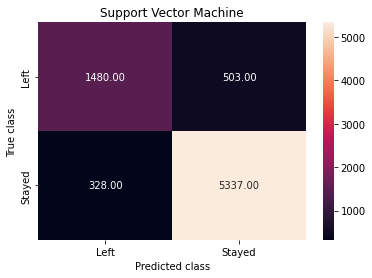

In [44]:
#Confusion Matrix for SVM
svc_y_pred = svc.predict(X_test)
svc_cm = metrics.confusion_matrix(svc_y_pred, y_test, [1,0])
sns.heatmap(svc_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.savefig('support_vector_machine')

### XGBoost Classifier 

In [45]:
xgb=XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
print('XGBoost accuracy: {:.3f}'.format(accuracy_score(y_test, xgb.predict(X_test))))

XGBoost accuracy: 0.963


In [47]:
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      5840
           1       0.91      0.93      0.92      1808

    accuracy                           0.96      7648
   macro avg       0.95      0.95      0.95      7648
weighted avg       0.96      0.96      0.96      7648



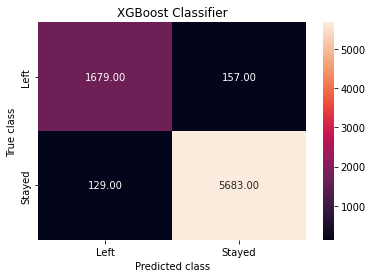

In [48]:
#Confusion Matrix for XGBoost Classifier
xgb_y_pred = xgb.predict(X_test)
xgb_cm = metrics.confusion_matrix(xgb_y_pred, y_test, [1,0])
sns.heatmap(xgb_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('XGBoost Classifier')
plt.savefig('XGBoost_Classifier')

### AdaBoost Algorithm

In [49]:
#Adaboost algorithm
adaboost = AdaBoostClassifier(n_estimators=100,learning_rate=0.1,random_state=0)
adaboost.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=0)

In [50]:
print('adaboost algorithm accuracy: {:.3f}'.format(accuracy_score(y_test,adaboost.predict(X_test))))

adaboost algorithm accuracy: 0.901


In [51]:
#Classification report for adaboost algorithm
print(classification_report(y_test, adaboost.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5840
           1       0.91      0.65      0.75      1808

    accuracy                           0.90      7648
   macro avg       0.90      0.81      0.85      7648
weighted avg       0.90      0.90      0.89      7648



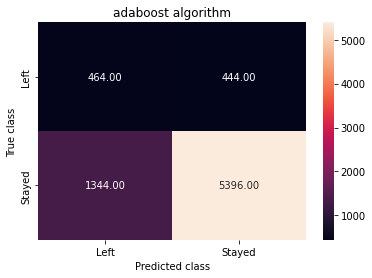

In [52]:
#Confusion Matrix for adaboost algorithm
adaboost_y_pred = adaboost.predict(X_test)
adaboost_cm = metrics.confusion_matrix(adaboost_y_pred, y_test, [1,0])
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('adaboost algorithm')
plt.savefig('adaboost_algorithm')

### LGBM Classfier

In [53]:
eval_set = [(X_train, y_train), (X_test, y_test)]

In [54]:
lgb_model = LGBMClassifier(random_state=123,eval_metric=["error", "logloss"], eval_set=eval_set)
lgb_model.fit(X_train, y_train)

[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[L

LGBMClassifier(eval_metric=['error', 'logloss'],
               eval_set=[(       satisfaction_level  time_spend_company  Work_accident  \
23137                 4.0                   3              0   
24880                 3.8                   3              0   
13772                 8.4                   3              0   
19650                 4.4                   3              1   
8130                  6.5                   5              0   
...                   ...                 ...            ...   
13123                 3.1                   3              1   
19648                 5.2                   3              0   
9845                  6.2                   3              0   
10799                 1.1                   4              0   
2732                  2.3                   4              0   

       promotion_last_5years  department_RandD  department_hr  \
23137                      0                 0              0   
24880                     

In [55]:
print('LGBM accuracy: {:.3f}'.format(accuracy_score(y_test, lgb_model.predict(X_test))))

LGBM accuracy: 0.960


In [56]:
print(classification_report(y_test, lgb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5840
           1       0.91      0.92      0.92      1808

    accuracy                           0.96      7648
   macro avg       0.94      0.95      0.95      7648
weighted avg       0.96      0.96      0.96      7648



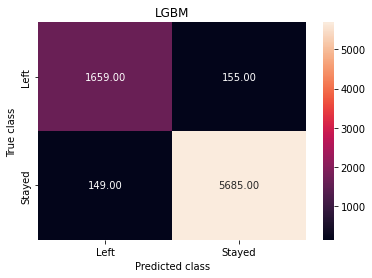

In [57]:
#Confusion Matrix for Logistic Regression
lgb_model_y_pred = lgb_model.predict(X_test)
lgb_model_cm = metrics.confusion_matrix(lgb_model_y_pred, y_test, [1,0])
sns.heatmap(lgb_model_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('LGBM')
plt.savefig('lgbm')

### 10 Fold Cross Validation

In [58]:
#For logistic regression
logreg_kfold = model_selection.KFold(n_splits=10, random_state=7,shuffle=True)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=logreg_kfold, scoring=scoring)
print("cross validation average accuracy for logistic regression: %.3f" % (results.mean()))

cross validation average accuracy for logistic regression: 0.774


In [59]:
#For Random Forest
rf_kfold = model_selection.KFold(n_splits=10, random_state=7,shuffle=True)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=rf_kfold, scoring=scoring)
print("cross validation average accuracy for Random Forest Classifier: %.3f" % (results.mean()))

cross validation average accuracy for Random Forest Classifier: 0.962


In [60]:
#For SVM
svm_kfold = model_selection.KFold(n_splits=10, random_state=7,shuffle=True)
modelCV = SVC()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=svm_kfold, scoring=scoring)
print("cross validation average accuracy for SVM Classifier: %.3f" % (results.mean()))

cross validation average accuracy for SVM Classifier: 0.891


In [61]:
#For XGBoost
xg_kfold = model_selection.KFold(n_splits=10, random_state=7,shuffle=True)
modelCV = XGBClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=xg_kfold, scoring=scoring)
print("cross validation average accuracy for XGBoost Classifier: %.3f" % (results.mean()))

cross validation average accuracy for XGBoost Classifier: 0.960


In [62]:
#For AdaBoost
adaboost_kfold = model_selection.KFold(n_splits=10, random_state=7,shuffle=True)
modelCV = AdaBoostClassifier(n_estimators=100,learning_rate=0.1,random_state=0)
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=adaboost_kfold, scoring=scoring)
print("cross validation average accuracy for AdaBoost Classifier: %.3f" % (results.mean()))

cross validation average accuracy for AdaBoost Classifier: 0.899


In [63]:
#For LGBM
lgbm_kfold = model_selection.KFold(n_splits=10, random_state=7,shuffle=True)
modelCV = LGBMClassifier(random_state=123,eval_metric=["error", "logloss"], eval_set=eval_set)
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=lgbm_kfold, scoring=scoring)

[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[L

[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[L

[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[L

[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[L

[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[L

[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[L

[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[L

[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[L

[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[L

[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[L

In [64]:
print("cross validation average accuracy foR lgbm Classifier: %.3f" % (results.mean()))

cross validation average accuracy foR lgbm Classifier: 0.961


### Ensemble method 1

In [65]:
# Instantiating a RandomForestClassifier
estimators=[('xgBoost',XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5,use_label_encoder=False,eval_metric='logloss')),
            ('randomforest',RandomForestClassifier(max_depth=10)),
            ('svm',svm.SVC(kernel="rbf"))]

In [66]:
stackClassifier=StackingClassifier(estimators=estimators,cv=10,final_estimator=LogisticRegression())

In [67]:
## 'Training' the Classifier
stackClassifier.fit(X_train, y_train)

[20:13:28] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:13:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:13:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are 

StackingClassifier(cv=10,
                   estimators=[('xgBoost',
                                XGBClassifier(base_score=None, booster='dart',
                                              colsample_bylevel=0.6,
                                              colsample_bynode=0.5,
                                              colsample_bytree=0.6,
                                              eval_metric='logloss', gamma=0.6,
                                              gpu_id=None,
                                              importance_type='gain',
                                              interaction_constraints=None,
                                              learning_rate=0.01,
                                              max_delta_step=None, max_depth=15,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
              

In [68]:
print('ensemble method 1 accuracy: {:.3f}'.format(accuracy_score(y_test,stackClassifier.predict(X_test))))

ensemble method 1 accuracy: 0.958


In [69]:
print(classification_report(y_test,stackClassifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5840
           1       0.91      0.91      0.91      1808

    accuracy                           0.96      7648
   macro avg       0.94      0.94      0.94      7648
weighted avg       0.96      0.96      0.96      7648



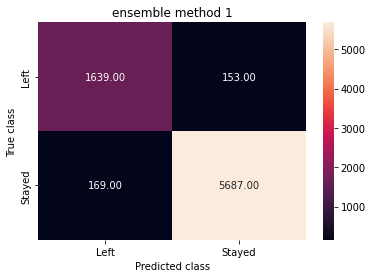

In [70]:
#Confusion Matrix for ensemble method 3
stackClassifier_y_pred = stackClassifier.predict(X_test)
stackClassifier_cm = metrics.confusion_matrix(stackClassifier_y_pred, y_test, [1,0])
sns.heatmap(stackClassifier_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('ensemble method 1')
plt.savefig('ensemble_method_1')

### Individual algorithms (KNN, RF, SVR, GaussianNB)

In [71]:
#KNN

knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
print('KNN accuracy: {:.3f}'.format(accuracy_score(y_test, knn.predict(X_test))))

#rf

rf=RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
print('RF accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

#SVR
svr=LinearSVC()
svr.fit(X_train,y_train)
print('SVR accuracy: {:.3f}'.format(accuracy_score(y_test, svr.predict(X_test))))

#Gaussian
gaussian_NB=GaussianNB()
gaussian_NB.fit(X_train,y_train)
print('GaussianNB accuracy: {:.3f}'.format(accuracy_score(y_test, gaussian_NB.predict(X_test))))

KNN accuracy: 0.948
RF accuracy: 0.965
SVR accuracy: 0.769
GaussianNB accuracy: 0.593


### Ensemble Method 2

In [72]:
k = KNeighborsClassifier(n_neighbors=7)
g = GaussianNB()
rf = RandomForestClassifier()

estimators = [
    ('k', k), ('g', g), ('l', lgb_model), ('rf', rf)
]

In [73]:
vote = VotingClassifier(voting='hard', estimators=estimators)
vote.fit(X_train, y_train)

[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 3 is set=, 3= will be ignored. Current value: 3=
[L

VotingClassifier(estimators=[('k', KNeighborsClassifier(n_neighbors=7)),
                             ('g', GaussianNB()),
                             ('l',
                              LGBMClassifier(eval_metric=['error', 'logloss'],
                                             eval_set=[(       satisfaction_level  time_spend_company  Work_accident  \
23137                 4.0                   3              0   
24880                 3.8                   3              0   
13772                 8.4                   3              0   
19650                 4.4                   3              1   
8130                  6.5                   5              0   
...                   ...                 ...            ...   
13123                 3.1                   3              1   
19648                 5.2                   3              0   
9845                  6.2                   3              0   
10799                 1.1                   4              0   
273

In [74]:
print('Ensemble method 2 accuracy: {:.3f}'.format(accuracy_score(y_test, vote.predict(X_test))))

Ensemble method 2 accuracy: 0.961


In [75]:
print(classification_report(y_test, vote.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      5840
           1       0.92      0.92      0.92      1808

    accuracy                           0.96      7648
   macro avg       0.95      0.95      0.95      7648
weighted avg       0.96      0.96      0.96      7648



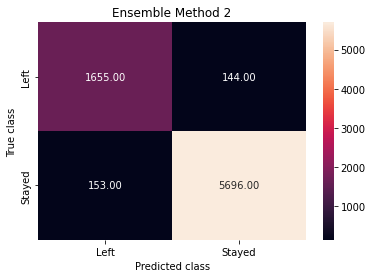

In [76]:
vote_y_pred = vote.predict(X_test)
vote_cm = metrics.confusion_matrix(vote_y_pred, y_test, [1,0])
sns.heatmap(vote_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Ensemble Method 2')
plt.savefig('ensemble_method_2')

### Ensemble Method 3

In [77]:
estimators = [
  ('knn', KNeighborsClassifier(n_neighbors=1)),
   ('rf', RandomForestClassifier()),
   ('svr', LinearSVC())
]

In [78]:
clf = StackingClassifier(
 estimators=estimators, final_estimator=LogisticRegression()
 )

In [79]:
clf.fit(X_train, y_train)

StackingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=1)),
                               ('rf', RandomForestClassifier()),
                               ('svr', LinearSVC())],
                   final_estimator=LogisticRegression())

In [80]:
print('Ensemble method 3 - accuracy: {:.3f}'.format(accuracy_score(y_test, clf.predict(X_test))))

Ensemble method 3 - accuracy: 0.964


In [81]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5840
           1       0.92      0.93      0.92      1808

    accuracy                           0.96      7648
   macro avg       0.95      0.95      0.95      7648
weighted avg       0.96      0.96      0.96      7648



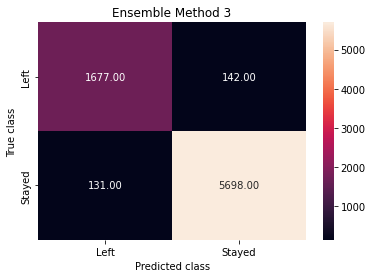

In [82]:
clf_y_pred = clf.predict(X_test)
clf_cm = metrics.confusion_matrix(clf_y_pred, y_test, [1,0])
sns.heatmap(clf_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Ensemble Method 3')
plt.savefig('ensemble_method_3')

### Ensemble method 4

In [83]:
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=42)
clf3 = GaussianNB()
lr = LogisticRegression()

sclf = StackingCVClassifier(classifiers=[clf1, clf2, clf3],
                            meta_classifier=lr,
                            random_state=42)

In [84]:
sclf.fit(X_train, y_train)

StackingCVClassifier(classifiers=[KNeighborsClassifier(n_neighbors=1),
                                  RandomForestClassifier(random_state=42),
                                  GaussianNB()],
                     meta_classifier=LogisticRegression(), random_state=42)

In [85]:
print('Ensemble method 4 accuracy: {:.3f}'.format(accuracy_score(y_test, sclf.predict(X_test))))

Ensemble method 4 accuracy: 0.965


In [86]:
print(classification_report(y_test, sclf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      5840
           1       0.91      0.94      0.93      1808

    accuracy                           0.97      7648
   macro avg       0.95      0.96      0.95      7648
weighted avg       0.97      0.97      0.97      7648



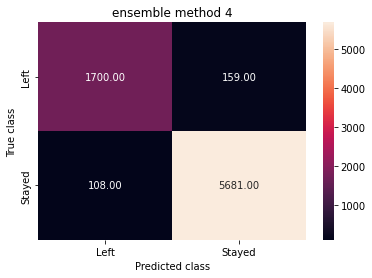

In [87]:
sclf_y_pred = sclf.predict(X_test)
sclf_cm = metrics.confusion_matrix(sclf_y_pred, y_test, [1,0])
sns.heatmap(sclf_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('ensemble method 4')
plt.savefig('ensemble_method_4')

### Ensemble method 5

The stack allows tuning hyper parameters of the base and meta models. GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method.

In [88]:
# Initializing models

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=42)
clf3 = GaussianNB()
lr = LogisticRegression()

sclf = StackingCVClassifier(classifiers=[clf1, clf2, clf3], 
                            meta_classifier=lr,
                            random_state=42)

params = {'kneighborsclassifier__n_neighbors': [1, 5],
          'randomforestclassifier__n_estimators': [10, 50],
          'meta_classifier__C': [0.1, 10.0]}

grid = GridSearchCV(estimator=sclf, 
                    param_grid=params, 
                    cv=5,
                    refit=True)
grid.fit(X, y)

cv_keys = ('mean_test_score', 'std_test_score', 'params')

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))

print('Best parameters: %s' % grid.best_params_)
print('Ensemble Method 5 - Accuracy: %.2f' % grid.best_score_)

0.964 +/- 0.00 {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 10}
0.965 +/- 0.00 {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 50}
0.964 +/- 0.00 {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 10.0, 'randomforestclassifier__n_estimators': 10}
0.965 +/- 0.00 {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 10.0, 'randomforestclassifier__n_estimators': 50}
0.963 +/- 0.00 {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 10}
0.965 +/- 0.00 {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 50}
0.964 +/- 0.00 {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 10.0, 'randomforestclassifier__n_estimators': 10}
0.965 +/- 0.00 {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 10.0, 'randomforestclassifier_

### Ensemble Method 6

In case we are planning to use a regression algorithm multiple times, all we need to do is to add an additional number suffix in the parameter grid 

In [89]:
# Initializing models

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=42)
clf3 = GaussianNB()
lr = LogisticRegression()

sclf = StackingCVClassifier(classifiers=[clf1, clf1, clf2, clf3], 
                            meta_classifier=lr,
                            random_state=42)

params = {'kneighborsclassifier-1__n_neighbors': [1, 5],
          'kneighborsclassifier-2__n_neighbors': [1, 5],
          'randomforestclassifier__n_estimators': [10, 50],
          'meta_classifier__C': [0.1, 10.0]}

grid = GridSearchCV(estimator=sclf, 
                    param_grid=params, 
                    cv=5,
                    refit=True)
grid.fit(X, y)

cv_keys = ('mean_test_score', 'std_test_score', 'params')

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))

print('Best parameters: %s' % grid.best_params_)
print('Accuracy: %.2f' % grid.best_score_)

0.964 +/- 0.00 {'kneighborsclassifier-1__n_neighbors': 1, 'kneighborsclassifier-2__n_neighbors': 1, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 10}
0.965 +/- 0.00 {'kneighborsclassifier-1__n_neighbors': 1, 'kneighborsclassifier-2__n_neighbors': 1, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 50}
0.964 +/- 0.00 {'kneighborsclassifier-1__n_neighbors': 1, 'kneighborsclassifier-2__n_neighbors': 1, 'meta_classifier__C': 10.0, 'randomforestclassifier__n_estimators': 10}
0.965 +/- 0.00 {'kneighborsclassifier-1__n_neighbors': 1, 'kneighborsclassifier-2__n_neighbors': 1, 'meta_classifier__C': 10.0, 'randomforestclassifier__n_estimators': 50}
0.964 +/- 0.00 {'kneighborsclassifier-1__n_neighbors': 1, 'kneighborsclassifier-2__n_neighbors': 5, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 10}
0.965 +/- 0.00 {'kneighborsclassifier-1__n_neighbors': 1, 'kneighborsclassifier-2__n_neighbors': 5, 'meta_classifier__C': 0.1, 'randomforestcla